**Loading the required librariries such as Pandas, Numpy, Matplotlib and Seaborn**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/student-mat.csv',delimiter=';')


**Data Exploration**

In [4]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:

print(data.tail())


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[5 rows x 33 columns]


In [6]:

print(data.isnull().sum())


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [7]:
print(data.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [8]:
print(data.shape)

(395, 33)


**DATA CLEANING**

In [9]:
data = data.fillna(data.median(numeric_only=True))


In [10]:
data = data.drop_duplicates()

Data Analysis Questions

1. What is the average score in math (G3)?

In [11]:
average_G3 = data['G3'].mean()
print("Average final grade (G3):", average_G3)

Average final grade (G3): 10.415189873417722


2. **How many students scored above 15 in their final grade (G3)?**

In [12]:
above_15 = data[data['G3'] > 15].shape[0]
print("Number of students with G3 > 15:", above_15)

Number of students with G3 > 15: 40


** Is there a correlation between study time (study time) and the final grade (G3)?**

In [13]:
correlation = data['studytime'].corr(data['G3'])
print("Correlation between study time and G3:", correlation)


Correlation between study time and G3: 0.09781968965319626


**. Which gender has a higher average final grade (G3)?**

In [14]:
avg_by_gender = data.groupby('sex')['G3'].mean()
print("Average G3 by gender:\n", avg_by_gender)

Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


** Which gender has a higher average final grade (G3)?**

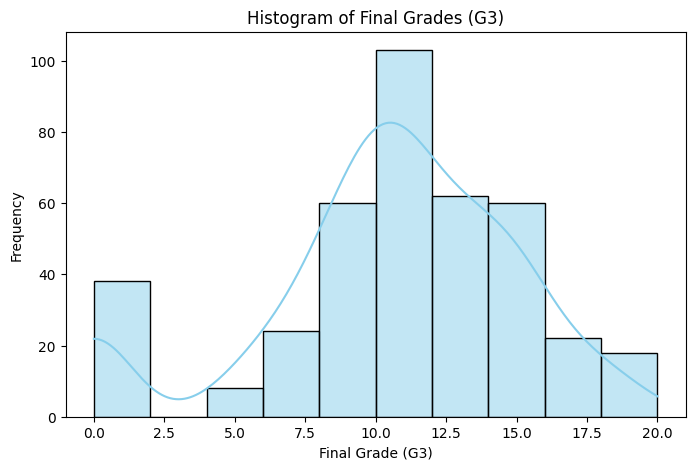

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data['G3'], kde=True, bins=10, color='skyblue')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()



**Create a scatter plot between study time (study time) and final grade (G3)**

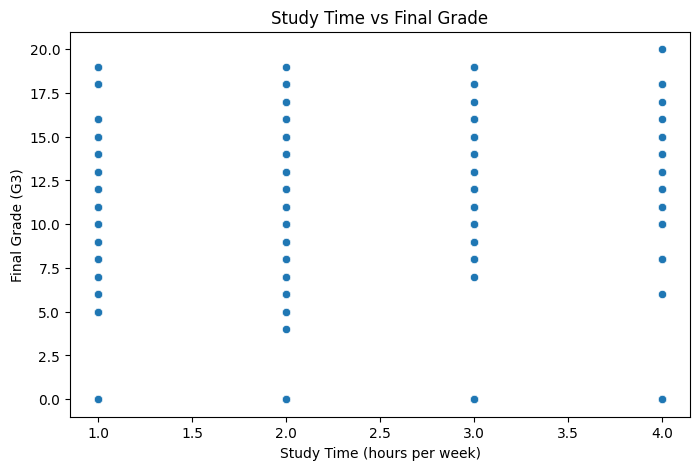

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='studytime', y='G3', data=data)
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Final Grade (G3)')
plt.show()



**Create a bar chart comparing the average scores of male and female students.**

<ipython-input-17-25bd3e55f729>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='G3', data=data, palette='pastel')


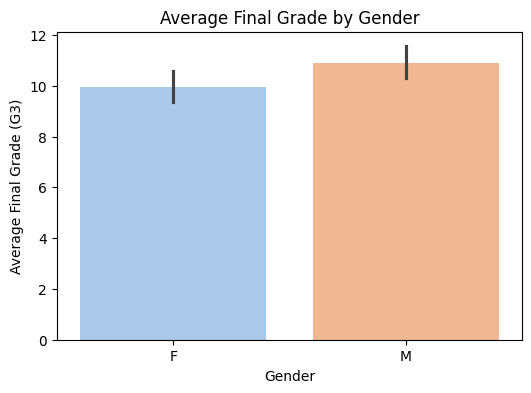

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='G3', data=data, palette='pastel')
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()